# Data Preparation and Customer Analytics
# Task 1

Conduct analysis on client's transaction dataset and identify customer purchasing behaviours to generate insights and provide commercial recommendations.

## Background Information for Task

We need to present a strategic recommendation to Julia that is supported by data which she can then use for the upcoming category review however to do so we need to analyse the data to understand the current purchasing trends and behaviours. The client is particularly interested in customer segments and their chip purchasing behaviour. Consider what metrics would help describe the customers’ purchasing behaviour.

## Work FLow

**1. Examine transaction data;** 

    - Look for inconsistencies
    - missing data across the dataset
    - outliers
    - correctly identify category items
    - numeric data across all tables.
    
    If anomalies are determined, make necessary changes and save it
    
**2. Examine customer data;**

    - Look for inconsistencies
    - missing data across the dataset
    - outliers
    - correctly identify category items
    - numeric data across all tables.

After completing the above tasks, merge the two datasets so it is ready for analysis.

**3. Data analysis and customer segments;**

    - define metrics
    - look at total sales
    - drivers of sales
    - where the highest sales are coming from
    - create charts and graphs
    - note interesting trends and insights
    
**4. Deep dive into customer segments;**

    - define recommendation from insights
    - determine which segments should be targeted
    - form overall conclusion based on analysis
    
**4. Save analysis**

    - save analysis and visuals

We will start this analysis by loading required libraries for analysis

In [1]:
# load libriaries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
# import data
transaction_df = pd.read_csv("../data/QVI_transaction_data.csv")
customer_df = pd.read_csv("../data/QVI_purchase_behaviour.csv")

## Exploratory Data Analysis

In [3]:
# view the first 10 rows of the data
transaction_df.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [4]:
# check the data types of each column
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


We can observe that the `DATE` column has a data type of `int64` instead of a `datatime` format.

We will need to convert this from `int64` to `datetime`.

**Convert Data column to date time format**

In [5]:
transaction_df["DATE"]

0         43390
1         43599
2         43605
3         43329
4         43330
          ...  
264831    43533
264832    43325
264833    43410
264834    43461
264835    43365
Name: DATE, Length: 264836, dtype: int64

In [6]:
# import date and timedelta
from datetime import date, timedelta
start = date(year=1899, month=12, day=30)

transaction_df["DATE"] = transaction_df["DATE"].apply(lambda x: start + timedelta(x))

In [10]:
transaction_df["DATE"] = pd.to_datetime(transaction_df["DATE"])

In [11]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


We have now converted the Dates to date time format.

We should check that we are looking at the right products by examining `PROD_NAME`

In [12]:
# get all the unique product names
transaction_df["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

Looks like we are definitely looking at potato chips but how can we check that
these are all chips? We can do some basic text analysis by summarising the
individual words in the product name.

Examine the words in PROD_NAME to see if there are any incorrect entries such as products that are not chips

In [13]:
len(transaction_df["PROD_NAME"].unique())

114

We have 114 products in the data set

In [14]:
# check to see if all products ar chips
chip_product = []
for product in transaction_df["PROD_NAME"].unique():
    if "chip" in product.lower():
        chip_product.append(product)

print(len(chip_product))

33


Of the 114 unique products in the data set, only 33 are chip products

In [15]:
len(transaction_df["PROD_NAME"])

264836

In [16]:
transaction_df["PROD_NAME"].str.lower().str.contains("chip").sum()

74570

Of the 264836 in the rows 74570 are `chip` products.

In [17]:
# get the list of all the products names
productWords = list(transaction_df["PROD_NAME"].str.lower())
productWords

['natural chip        compny seasalt175g',
 'ccs nacho cheese    175g',
 'smiths crinkle cut  chips chicken 170g',
 'smiths chip thinly  s/cream&onion 175g',
 'kettle tortilla chpshny&jlpno chili 150g',
 'old el paso salsa   dip tomato mild 300g',
 'smiths crinkle chips salt & vinegar 330g',
 'grain waves         sweet chilli 210g',
 'doritos corn chip mexican jalapeno 150g',
 'grain waves sour    cream&chives 210g',
 'smiths crinkle chips salt & vinegar 330g',
 'kettle sensations   siracha lime 150g',
 'twisties cheese     270g',
 'ww crinkle cut      chicken 175g',
 'thins chips light&  tangy 175g',
 'ccs original 175g',
 'burger rings 220g',
 'ncc sour cream &    garden chives 175g',
 'doritos corn chip southern chicken 150g',
 'cheezels cheese box 125g',
 'smiths crinkle      original 330g',
 'ncc sour cream &    garden chives 175g',
 'infzns crn crnchers tangy gcamole 110g',
 'kettle sea salt     and vinegar 175g',
 'kettle tortilla chpshny&jlpno chili 150g',
 'old el paso salsa  

**Clean the `PROD_NAME` column**

As we are only interested in words that will tell us if the product is chips or
not, let's remove all words with digits and special characters such as '&' from our
set of product words

In [18]:
# Remove degits and special characters
productWords = list(transaction_df["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]',' ').str.lower())

C:\Users\Segun Lawal\AppData\Local\Temp\ipykernel_36424\100728002.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  productWords = list(transaction_df["PROD_NAME"].str.replace(r'([0-9]+[gG])','').str.replace(r'[^\w]',' ').str.lower())


In [19]:
productWords

['natural chip        compny seasalt',
 'ccs nacho cheese    ',
 'smiths crinkle cut  chips chicken ',
 'smiths chip thinly  s cream onion ',
 'kettle tortilla chpshny jlpno chili ',
 'old el paso salsa   dip tomato mild ',
 'smiths crinkle chips salt   vinegar ',
 'grain waves         sweet chilli ',
 'doritos corn chip mexican jalapeno ',
 'grain waves sour    cream chives ',
 'smiths crinkle chips salt   vinegar ',
 'kettle sensations   siracha lime ',
 'twisties cheese     ',
 'ww crinkle cut      chicken ',
 'thins chips light   tangy ',
 'ccs original ',
 'burger rings ',
 'ncc sour cream      garden chives ',
 'doritos corn chip southern chicken ',
 'cheezels cheese box ',
 'smiths crinkle      original ',
 'ncc sour cream      garden chives ',
 'infzns crn crnchers tangy gcamole ',
 'kettle sea salt     and vinegar ',
 'kettle tortilla chpshny jlpno chili ',
 'old el paso salsa   dip tomato mild ',
 'smiths chip thinly  cut original ',
 'kettle original ',
 'red rock deli thai 

**Most common words**

Let's look at the most common words by counting the number of times a word
appears and sorting them by this frequency in order of highest to lowest frequency

In [20]:
all_words = "".join( productWords).split()
all_words

['natural',
 'chip',
 'compny',
 'seasaltccs',
 'nacho',
 'cheese',
 'smiths',
 'crinkle',
 'cut',
 'chips',
 'chicken',
 'smiths',
 'chip',
 'thinly',
 's',
 'cream',
 'onion',
 'kettle',
 'tortilla',
 'chpshny',
 'jlpno',
 'chili',
 'old',
 'el',
 'paso',
 'salsa',
 'dip',
 'tomato',
 'mild',
 'smiths',
 'crinkle',
 'chips',
 'salt',
 'vinegar',
 'grain',
 'waves',
 'sweet',
 'chilli',
 'doritos',
 'corn',
 'chip',
 'mexican',
 'jalapeno',
 'grain',
 'waves',
 'sour',
 'cream',
 'chives',
 'smiths',
 'crinkle',
 'chips',
 'salt',
 'vinegar',
 'kettle',
 'sensations',
 'siracha',
 'lime',
 'twisties',
 'cheese',
 'ww',
 'crinkle',
 'cut',
 'chicken',
 'thins',
 'chips',
 'light',
 'tangy',
 'ccs',
 'original',
 'burger',
 'rings',
 'ncc',
 'sour',
 'cream',
 'garden',
 'chives',
 'doritos',
 'corn',
 'chip',
 'southern',
 'chicken',
 'cheezels',
 'cheese',
 'box',
 'smiths',
 'crinkle',
 'original',
 'ncc',
 'sour',
 'cream',
 'garden',
 'chives',
 'infzns',
 'crn',
 'crnchers',
 'tan

In [21]:
# get a count of the most frequent words in the product name
from collections import Counter

pd.Series(Counter(all_words)).sort_values(ascending=False)

chips           49770
kettle          38851
cheese          27890
smiths          26969
salt            24719
                ...  
chcknburger         8
chickenncc          8
saltgrnwves         8
htsunbites          8
saltsunbites        5
Length: 426, dtype: int64

We can see the most frequently occurring words and the least occurring words.

There are salsa products in the dataset but we are only interested in the chips
category, so let's remove these.

In [22]:
(~transaction_df["PROD_NAME"].str.lower().str.contains("salas")).sum()

264836

In [23]:
# get all entries that do not contain "salsa"
transaction_df["PROD_NAME"].str.lower().str.contains("salas")

0         False
1         False
2         False
3         False
4         False
          ...  
264831    False
264832    False
264833    False
264834    False
264835    False
Name: PROD_NAME, Length: 264836, dtype: bool

In [24]:
# Number of products that contains "salsa"
transaction_df["PROD_NAME"].str.lower().str.contains("salsa").sum()

18094

In [25]:
# number of products that do not contain "salsa"
(~transaction_df["PROD_NAME"].str.lower().str.contains("salsa")).sum()

246742

In [26]:
transaction_df.shape

(264836, 8)

**Drop Salsa products**

In [27]:
# products that do not contain "salsa"
transaction_df = transaction_df[~transaction_df["PROD_NAME"].str.lower().str.contains("salsa")]

In [29]:
transaction_df.shape

(246742, 8)

We have removed the salsa products from our data set.

Next, we check the summary statistics such as mean, min and max values for each feature to see if there are any obvious outliers in the data and if
there are any nulls in any of the columns.

In [30]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


**View Summary Statistics**

In [31]:
transaction_df.describe().T

,count,mean,std,min,25%,50%,75%,max
STORE_NBR,246742.0,135.051098,76.787096,1.0,70.00,130.0,203.00,272.0
LYLTY_CARD_NBR,246742.0,135530.984956,80715.280765,1000.0,70015.00,130367.0,203084.00,2373711.0
TXN_ID,246742.0,135131.098848,78147.717692,1.0,67569.25,135183.0,202653.75,2415841.0
PROD_NBR,246742.0,56.351789,33.695428,1.0,26.00,53.0,87.00,114.0
PROD_QTY,246742.0,1.908062,0.659831,1.0,2.00,2.0,2.00,200.0
TOT_SALES,246742.0,7.321322,3.077828,1.7,5.80,7.4,8.80,650.0


---------------------------------------------------------------------------------------------------- 

---------------------------------------------------------------------------------------------------- 

---------------------------------------------------------------------------------------------------- 

---------------------------------------------------------------------------------------------------- 

---------------------------------------------------------------------------------------------------- 

---------------------------------------------------------------------------------------------------- 



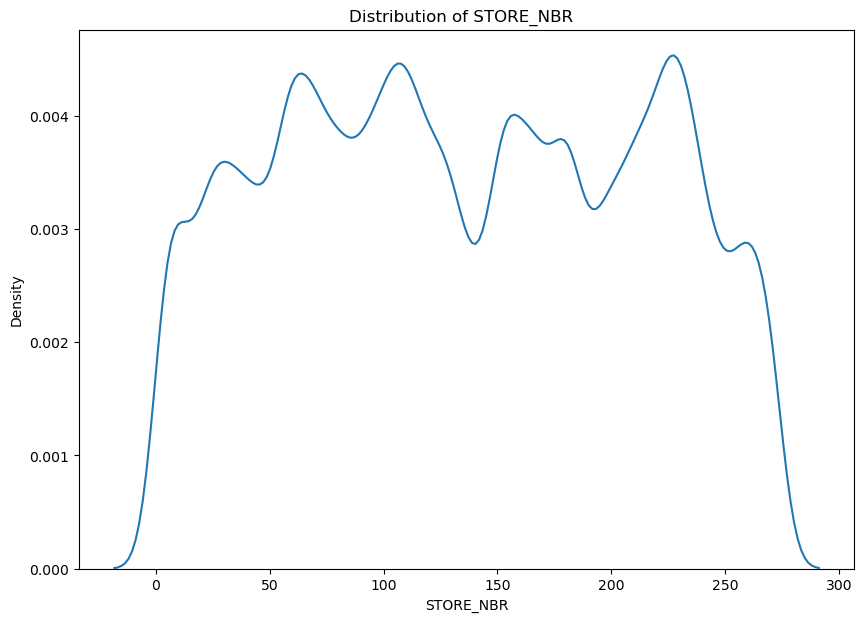

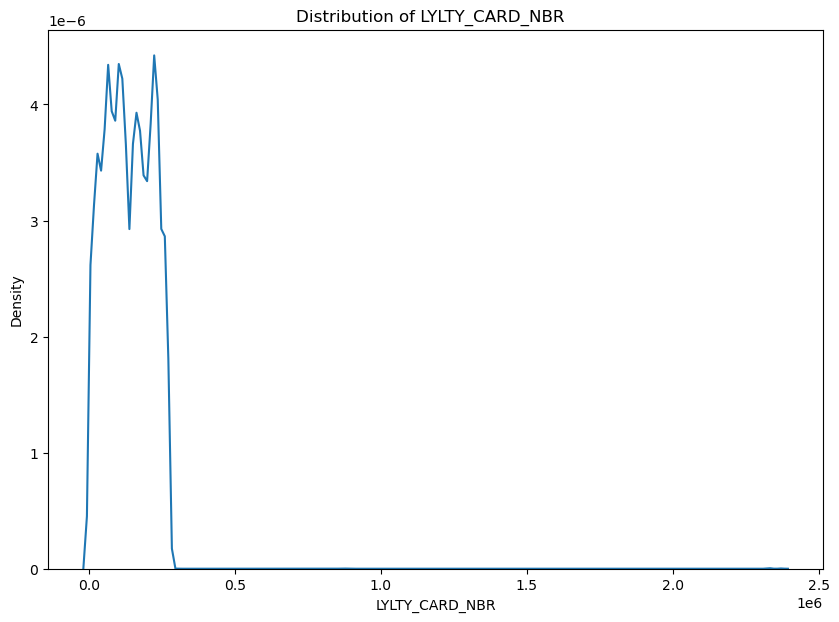

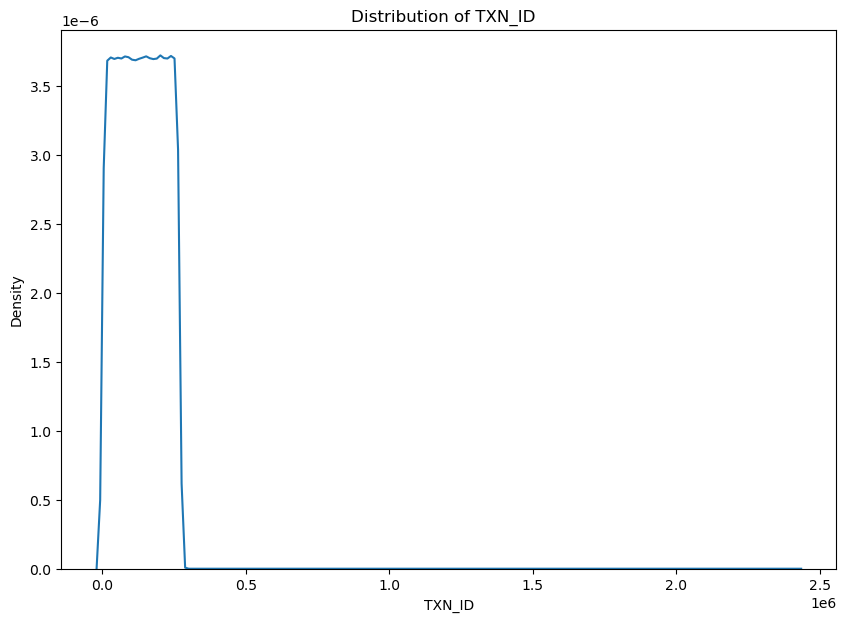

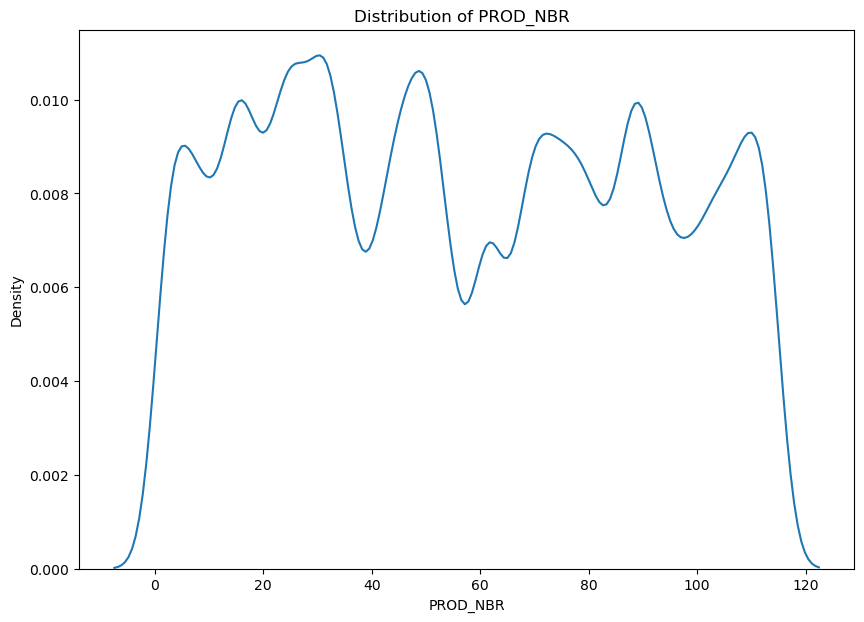

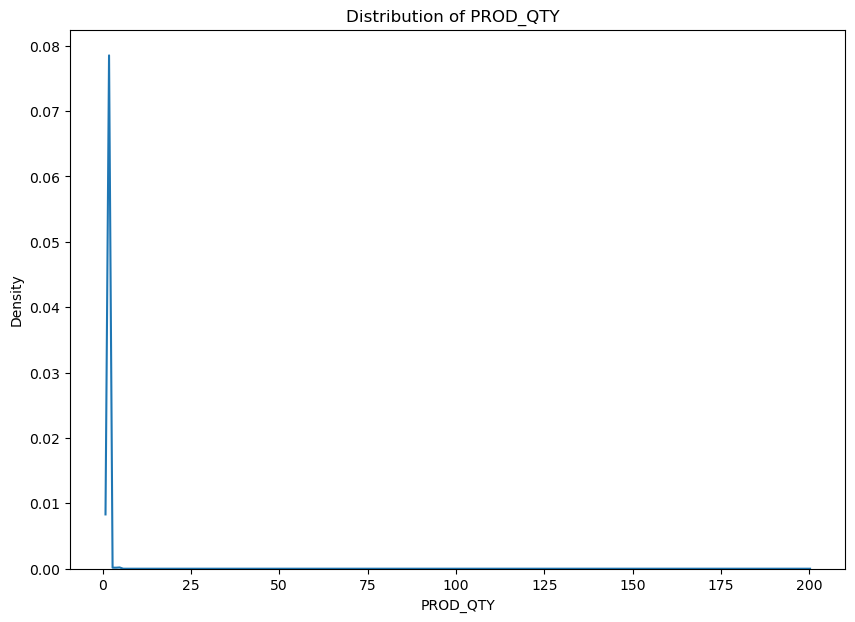

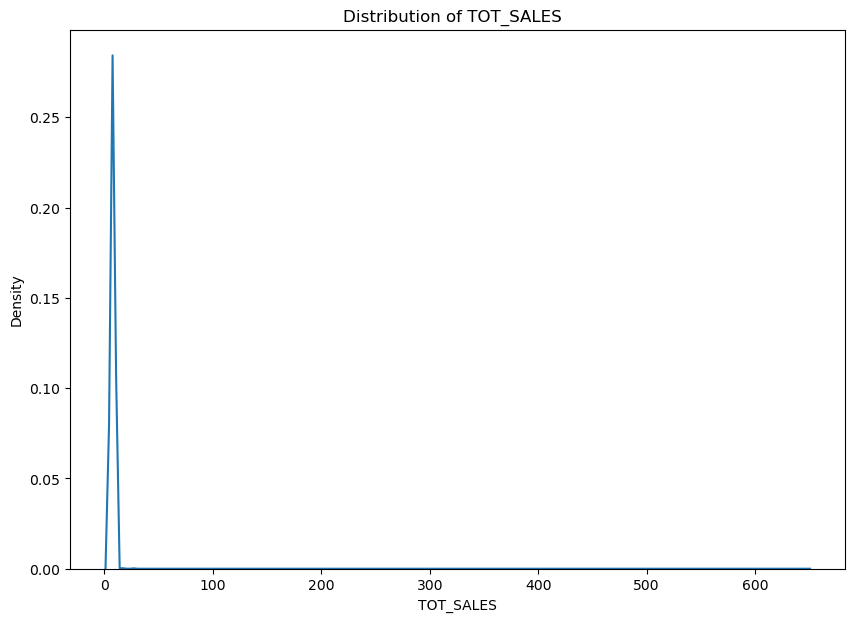

In [39]:
# view the kde distribution of numeric columns
for col in transaction_df.select_dtypes(include=["int64", "float64"]).columns:
    print("-"*100, "\n")
    plt.figure(figsize=(10, 7))
    sns.kdeplot(x=col, data=transaction_df);

We can observe that `TOT_SALES` and `PROD_QTY` has outliers.

There are no nulls in the columns but product quantity appears to have an outlier
which we should investigate further. Let's investigate further the case where 200
packets of chips are bought in one transaction.

In [32]:
transaction_df["TOT_SALES"].value_counts()

9.2      22821
7.4      22513
6.0      20796
7.6      20212
8.8      19900
         ...  
9.3          3
6.9          3
12.4         2
650.0        2
11.2         2
Name: TOT_SALES, Length: 105, dtype: int64

In [33]:
transaction_df["PROD_QTY"].value_counts()

2      220070
1       25476
5         415
3         408
4         371
200         2
Name: PROD_QTY, dtype: int64

There are two transactions where 200 packets of chips are bought in one transaction
and both of these transactions were by the same customer.

In [40]:
# examin the two transactions with values == 200
transaction_df[transaction_df["PROD_QTY"] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


Let's see if the customer has had other transactions

In [41]:
# Check to see chstommer with card number 226000 had other transactions
transaction_df[transaction_df["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year and is not an ordinary retail customer. The customer might be buying chips for commercial purposes instead. We'll remove this loyalty card number from further analysis.

In [43]:
# drop customert with oyalty card number == 226000
transaction_df = transaction_df[transaction_df["LYLTY_CARD_NBR"] != 226000]

In [44]:
transaction_df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [45]:
transaction_df["PROD_QTY"].value_counts()

2    220070
1     25476
5       415
3       408
4       371
Name: PROD_QTY, dtype: int64

This is better now

**number of transaction lines over time**

let's look at the number of transaction lines over time to see
if there are any obvious data issues such as missing data.

In [46]:
transaction_df["DATE"].nunique()

364

In [54]:
transaction_df["DATE"].min()

Timestamp('2018-07-01 00:00:00')

In [48]:
# first transaction day
min(transaction_df["DATE"])

Timestamp('2018-07-01 00:00:00')

In [49]:
# last transaction day
max(transaction_df["DATE"])

Timestamp('2019-06-30 00:00:00')

In [50]:
# total transaction days
max(transaction_df["DATE"]) - min(transaction_df["DATE"])

Timedelta('364 days 00:00:00')

There are only 364 day sales instead of 365.

There's only 364 unique rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.

In [55]:
# find missing date
pd.date_range(start=min(transaction_df["DATE"]), 
             end=max(transaction_df["DATE"])).difference(transaction_df["DATE"])

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

In [53]:

pd.date_range(start=transaction_df["DATE"].min(), 
              end=transaction_df["DATE"].max()).difference(transaction_df["DATE"])


DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

We can see that the missing date is '2018-12-25'

**Using the difference method we see that 2018-12-25 was a missing date**

In [70]:
# create a sequence of dates from 1 Jul 2018 to 30 Jun 2019
date_sequence = pd.date_range(start=transaction_df["DATE"].min(), 
                             end=transaction_df["DATE"].max())
date_sequence

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [71]:
len(date_sequence)

365

use this to create a
chart of number of transactions over time to find the missing date.

In [76]:
transaction_df["TOT_SALES"]

0          6.0
1          6.3
2          2.9
3         15.0
4         13.8
          ... 
264831    10.8
264832     4.4
264833     8.8
264834     7.8
264835     8.8
Name: TOT_SALES, Length: 246740, dtype: float64

TypeError: plot got an unexpected keyword argument 'y'

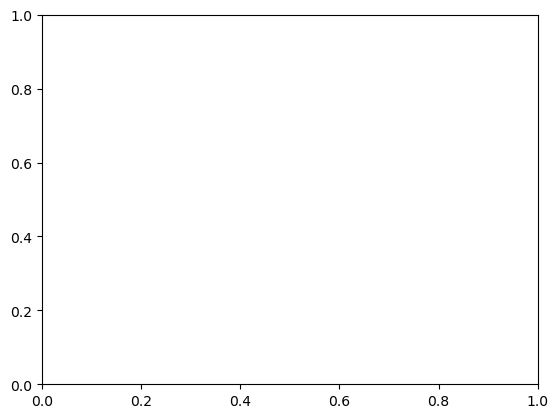

In [75]:
#create a chart of number of transactions over time to find the missing date.

plt.plot(X=date_sequence, y=transaction_df["TOT_SALES"])

In [ ]:
check_null_date = pd.merge(pd.Series(pd.date_range(start=merged_data["DATE"].min(), end = merged_data["DATE"].max()), name="DATE"), merged_data, on = "DATE", how = "left")


In [ ]:
trans_by_date = check_null_date["DATE"].value_counts()
dec = trans_by_date[(trans_by_date.index >= pd.datetime(2018,12,1)) & (trans_by_date.index < pd.datetime(2019,1,1))].sort_index()
dec.index = dec.index.strftime('%d')
ax = dec.plot(figsize=(15,3))
ax.set_xticks(np.arange(len(dec)))
ax.set_xticklabels(dec.index)
plt.title("2018 December Sales")
plt.savefig("2018 December Sales.png", bbox_inches="tight")
plt.show()